In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Análise Exploratória dos Dados

In [2]:
df_data = pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### Visualização Estatística

In [6]:
df_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

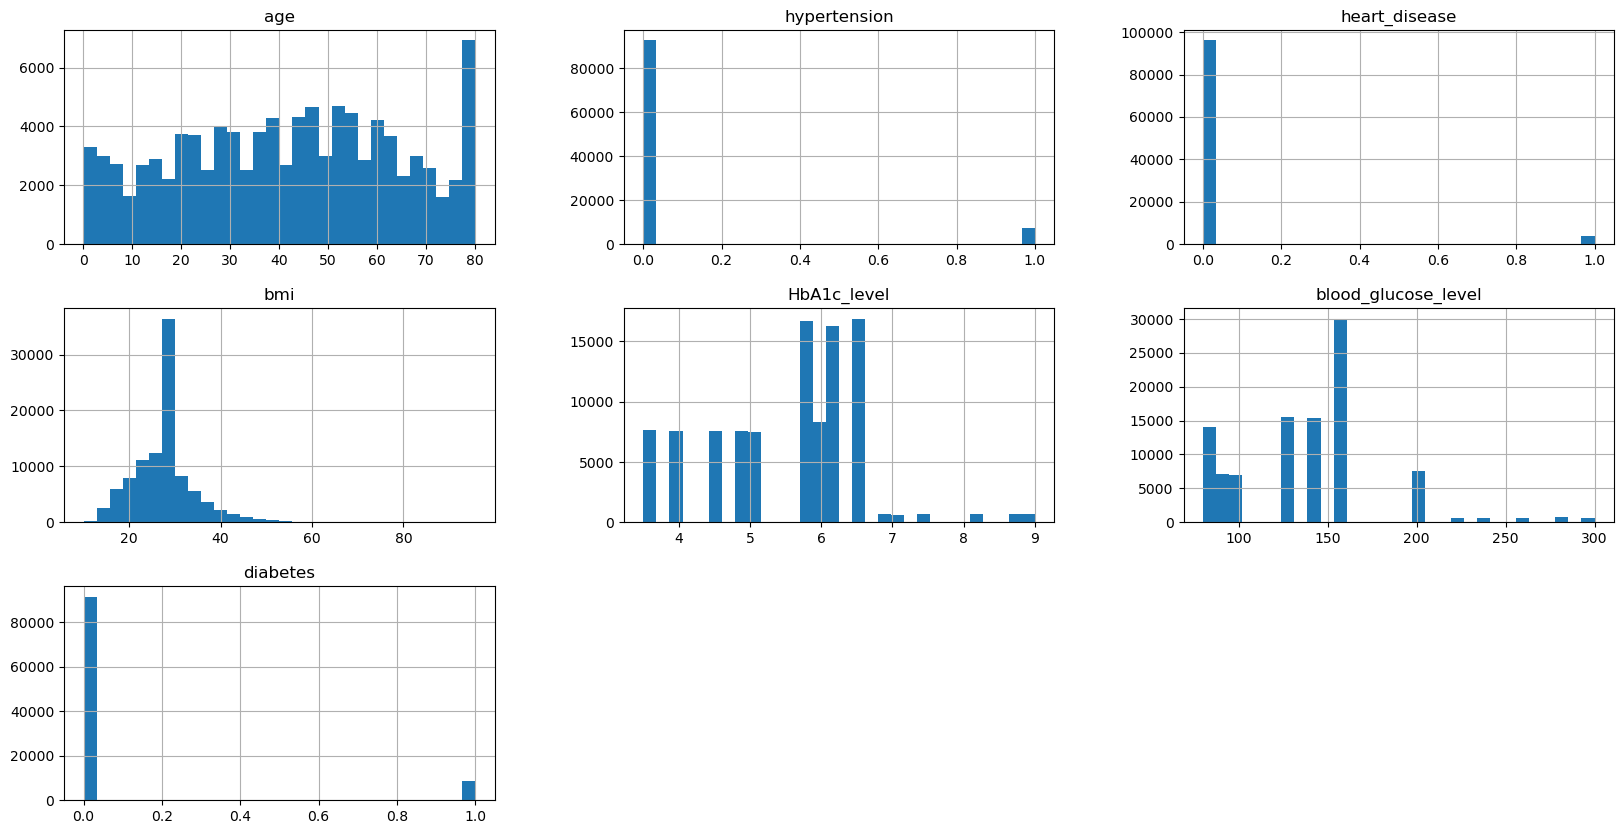

In [7]:
df_data.hist(bins= 30, figsize=(20,10))

In [8]:
df_data["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
df_data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [11]:
df_correlacao = df_data.drop(columns=['smoking_history', 'gender'])
df_correlacao.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [12]:
df_correlacao.corr()['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

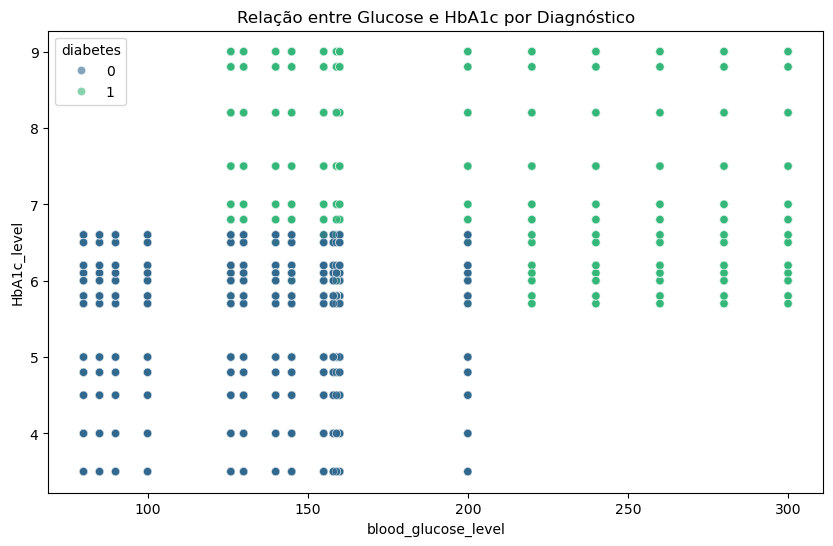

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_data, 
    x='blood_glucose_level', 
    y='HbA1c_level', 
    hue='diabetes', 
    palette='viridis',
    alpha=0.6
)
plt.title('Relação entre Glucose e HbA1c por Diagnóstico')
plt.show()

## 2.Preparacao dos dados para o modelo

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder_gender = OneHotEncoder(sparse_output=False)
encoder_smoking = OneHotEncoder(sparse_output=False)
gender_1hot = encoder_gender.fit_transform(df_data[['gender']])
smoking_1hot = encoder_smoking.fit_transform(df_data[['smoking_history']])

In [16]:
gender_1hot_df = pd.DataFrame(gender_1hot, columns=encoder_gender.get_feature_names_out(['gender']))
smoking_1hot_df = pd.DataFrame(smoking_1hot, columns=encoder_smoking.get_feature_names_out(['smoking_history']))

In [17]:
df_encoded = df_data.drop(['gender','smoking_history'], axis=1)
df_encoded = df_encoded.join([gender_1hot_df,smoking_1hot_df])
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  float64
 8   gender_Male                  100000 non-null  float64
 9   gender_Other                 100000 non-null  float64
 10  smoking_history_No Info      100000 non-null  float64
 11  smoking_history_current      100000 non-null  float64
 12  smoking_history_ever         100000 non-null  float64
 13  

## 3.Seleção e Treinamento de Multiplos modelos 

### RandomForestRegression (Apenas testando, não é adequado para esse projeto)

In [20]:
from sklearn.model_selection import train_test_split

Y = df_encoded['diabetes']
X = df_encoded.loc[:, df_encoded.columns != 'diabetes']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
from sklearn.metrics import mean_squared_error

preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train,preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.062110614515214775

In [24]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(rf_reg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
print(rf_rmse_scores)

[0.15953423 0.15630735 0.16829886 0.16007192 0.15659769 0.15675016
 0.15385065 0.16636098 0.16057286 0.15209544]


### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
from sklearn.metrics import accuracy_score, classification_report

preds_class = rf_clf.predict(x_train)

print(f"A acertividade do Modelo foi de {((accuracy_score(y_train, preds_class))*100):.2f}%")
print(classification_report(y_train, preds_class))
print(f"A acertividade do Modelo foi de {((accuracy_score(y_train, preds_class))*100)}%")

A acertividade do Modelo foi de 99.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64083
           1       1.00      0.99      1.00      5917

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

A acertividade do Modelo foi de 99.92428571428572%


### Melhorando/Otimizando o Modelo

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
param_grid = {
    'n_estimators': [10, 20, 30],        # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],     # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],     # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],       # Mínimo de amostras em uma folha
    'max_features': ['sqrt', 'log2'],    # Número de features consideradas em cada split
    'bootstrap': [True, False]           # Usar amostras com bootstrap ou não
}
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='f1',  # Métrica a ser otimizada
    cv=5,          # Número de folds na validação cruzada
    n_jobs=-1,     # Usar todos os núcleos do CPU
    verbose=2      # Mostrar logs durante o treinamento
)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='f1', verbose=2)

In [64]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=10)

In [81]:
preds_class = rf_clf.predict(x_test)
final_model = grid_search.best_estimator_
final_model_predictions = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predictions)
print(np.sqrt(final_mse))

0.16941074346097415


## 4.Resultados Finais/ Conclusões

In [116]:
print(f"A acertividade do modelo Inicial nos testes foi de  {((accuracy_score(y_test, preds_class))*100):.2f}%")
print(f"A acertividade do modelo Final e Otimizado nos testes foi de  {((accuracy_score(y_test, final_model_predictions))*100):.2f}%")

A acertividade do modelo Inicial nos testes foi de  96.99%
A acertividade do modelo Final e Otimizado nos testes foi de  97.13%


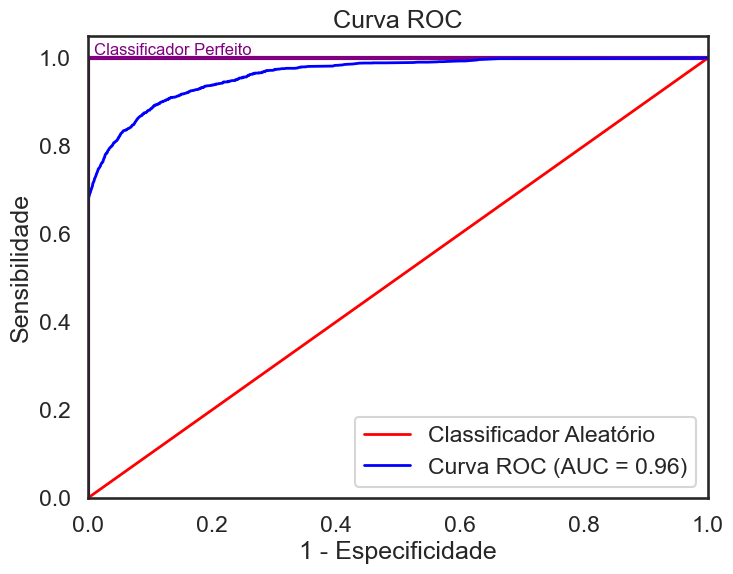

In [121]:
from sklearn.metrics import roc_curve, auc

y_scores = final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

sns.set_style("white")    
sns.set_context("talk")      

plt.figure(figsize=(8, 6))

# Moldura roxa (canto superior e lateral esquerda)
plt.plot([0, 0], [0, 1], color='purple', lw=3)
plt.plot([0, 1], [1, 1], color='purple', lw=3)

# Linha vermelha do classificador aleatório
sns.lineplot(x=[0, 1], y=[0, 1], color='red', lw=2, label='Classificador Aleatório')

# Curva ROC em azul
sns.lineplot(x=fpr, y=tpr, color='blue', lw=2, 
             label=f'Curva ROC (AUC = {roc_auc:.2f})')

# Limites dos eixos
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Rótulos (labels [rótulos]) e título
plt.xlabel('1 - Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC')

# Texto "Classificador Perfeito" no canto superior esquerdo
plt.text(0.01, 1, 'Classificador Perfeito',
         color='purple', fontsize=12, va='bottom')

plt.legend(loc='lower right')
plt.show()
